In [457]:
import math
import random
import pandas as pd
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

In [458]:
df = pd.read_csv("./data/train.csv")
example_id = df['example_id']
x = df['x']
y = df['TARGET']

In [459]:
df.head(10)

,example_id,x,TARGET
0,0,0.000,0.800000
1,1,0.001,0.800000
2,2,0.002,0.800000
3,3,0.003,0.799999
4,4,0.004,0.799998
5,5,0.005,0.799998
6,6,0.006,0.799996
7,7,0.007,0.799995
8,8,0.008,0.799994
9,9,0.009,0.799992


In [460]:
x.head(5)

0    0.000
1    0.001
2    0.002
3    0.003
4    0.004
Name: x, dtype: float64

Error: 0.6632923380112073
Period: 0.1394132269468652
Amplitud: 0.8512731188918626
Constant: 0.018097421265984313


Error: 0.7150474838545964
Period: 0.15787110565501367
Amplitud: 0.8512701277438249
Constant: 0.018109886950725986


Error: 0.6927823766336969
Period: 0.1437104270736343
Amplitud: 0.8512733772991968
Constant: 0.01810709286145283


Error: 0.6922193146030301
Period: 0.12161163461169319
Amplitud: 0.8512741911087433
Constant: 0.018117092133429588


Error: 0.7391819754248465
Period: 0.03750629309443557
Amplitud: 0.8512765369810563
Constant: 0.018112160762439766


Error: 1.0380504022643584
Period: 0.02939379102422976
Amplitud: 0.8512650833181462
Constant: 0.018042919973451095


Error: 1.004621561242946
Period: 0.015262707128808872
Amplitud: 0.8512591526431055
Constant: 0.018009262593810124


Error: 1.008125406258641
Period: -0.012165820639762846
Amplitud: 0.8512599204565897
Constant: 0.018232377997531996


Error: 1.051196242411126
Period: -0.02414596814624619
Amplitud: 0.85126833

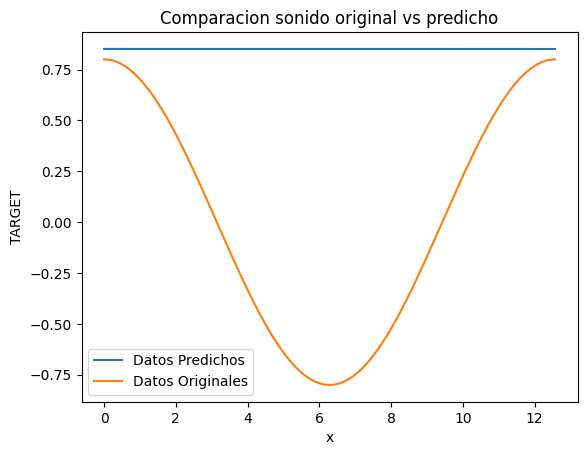

Error: 1.0725001847948572
Period: 0.01754202201867598
Amplitud: 0.8512515086068441
Constant: 0.017794510946198678


Error: 1.0837301801239245
Period: -0.02151221715949452
Amplitud: 0.8512534254714945
Constant: 0.018005592726872584


Error: 1.0153457426022086
Period: 0.022634730685883928
Amplitud: 0.8512537537252051
Constant: 0.017891006783757206


Error: 1.042716229606809
Period: -0.04170726854009878
Amplitud: 0.8512655511466001
Constant: 0.01799055318733455


Error: 0.9802427360226416
Period: -0.012947814150281626
Amplitud: 0.8512686268406977
Constant: 0.018029239750276763


Error: 1.045032908664074
Period: -0.05911025353839111
Amplitud: 0.851269249006118
Constant: 0.017781978658469432


Error: 0.9439625045675495
Period: -0.052286796351508305
Amplitud: 0.8512789084806187
Constant: 0.01776931873068964


Error: 0.9688437322882728
Period: 0.023048655402008414
Amplitud: 0.8512615650668184
Constant: 0.01777050474370879


Error: 1.0521442591546781
Period: 0.039276512498425765
Amplitud: 0.85

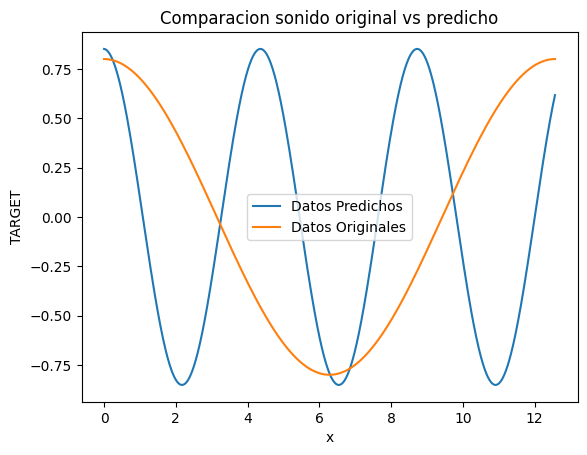

Error: 0.7519535605475389
Period: 1.4941184727757357
Amplitud: 0.8513088863548289
Constant: 0.01810841816739274


Error: 0.6903521992837112
Period: 1.5314066398128157
Amplitud: 0.8513152927448261
Constant: 0.018098829666032656


Error: 0.630692240757739
Period: 1.5322637741068452
Amplitud: 0.8513123438560009
Constant: 0.01810661508870649


Error: 0.6563672814909799
Period: 1.5216428260410855
Amplitud: 0.8513164906429957
Constant: 0.018107829151790707


Error: 0.6779555215413876
Period: 1.5508931557279506
Amplitud: 0.8512986218482193
Constant: 0.01810734534623235


Error: 0.6324716434192291
Period: 1.6256631005644855
Amplitud: 0.851293986285833
Constant: 0.018116077120833303


Error: 0.6174485223559792
Period: 1.6808707890124388
Amplitud: 0.8512922143756381
Constant: 0.01812417004934458


Error: 0.5897796443243508
Period: 1.7197763860638777
Amplitud: 0.8512858534052591
Constant: 0.018127914524098718


Error: 0.6412807307675609
Period: 1.6361865882478404
Amplitud: 0.851273882092364
Const

In [461]:
def y_predict(a,b,c,d,x):
    return a * math.cos(b * x + c) + d

lr = 0.0002
n = len(x)
batch = 1024
epochs = 1000
rsl = []
a = random.random()
b = random.random()
c = random.random()
d = 0
for i in range(epochs):
    a_gradiente = 0
    b_gradiente = 0
    c_gradiente = 0
    d_gradiente = 0
    error = 0
    if i == 10 or i == 400 or i == 1000 or i == 2000:
        data_y_hat = []
        a_final = rsl[-1][0]
        b_final = rsl[-1][1]
        c_final = rsl[-1][2]
        for value in x:
            data_y_hat.append(y_predict(a_final, b_final, c_final, d, value))
        plt.plot(x,data_y_hat,label="Datos Predichos")
        plt.plot(x,y,label="Datos Originales")
        plt.xlabel("x")
        plt.ylabel("TARGET")
        plt.title("Comparacion sonido original vs predicho")
        plt.legend()
        plt.show()
    for m in range(batch):
        ix = random.randint(0,n-1)
        y_pred = y_predict(a,b,c,d,x[ix])
        e = y[ix] - y_pred 
        error += e * e
        a_gradiente += -2*e*math.cos(b*ix+c)
        b_gradiente += 2*e*a*math.sin(b*ix+c)*ix
        c_gradiente += 2*e*a*math.sin(b*ix*c)
    
    a = a - lr * a_gradiente/batch
    b = b - lr * b_gradiente/batch
    c = c - lr * c_gradiente/batch
    
    error = error/batch
    rsl.append([a,b,c,d,error])
    print(f"Error: {error}\nPeriod: {b}\nAmplitud: {a}\nConstant: {c}\n\n")

In [462]:
data_y_hat = []
a_final = rsl[-1][0]
b_final = rsl[-1][1]
c_final = rsl[-1][2]
for value in x:
    data_y_hat.append(y_predict(a_final, b_final, c_final, d, value))

In [463]:
data_y_hat

[0.851167169330564,
 0.8511594526581702,
 0.8511515291046967,
 0.8511433986720697,
 0.8511350613622649,
 0.8511265171773091,
 0.8511177661192788,
 0.8511088081903012,
 0.8510996433925534,
 0.8510902717282632,
 0.8510806931997082,
 0.8510709078098064,
 0.8510609155581144,
 0.8510507164492251,
 0.8510403104856177,
 0.8510296976798016,
 0.8510188780017934,
 0.85100785149203,
 0.8509966181564612,
 0.8509851779630833,
 0.8509735309219346,
 0.8509616770493192,
 0.8509496163421774,
 0.8509373488077907,
 0.8509248744447905,
 0.8509121932624216,
 0.8508993052494784,
 0.8508862104233813,
 0.8508729087807311,
 0.8508594003555731,
 0.8508456850954096,
 0.8508317630372818,
 0.8508176341304727,
 0.8508032984992022,
 0.8507887560104981,
 0.8507740067919803,
 0.8507590507801149,
 0.850743887937815,
 0.8507285183542526,
 0.8507129419507897,
 0.8506971588313683,
 0.8506811688827485,
 0.8506649722266025,
 0.8506485687585047,
 0.8506319585757449,
 0.8506151415897698,
 0.8505981179226955,
 0.85058088751180

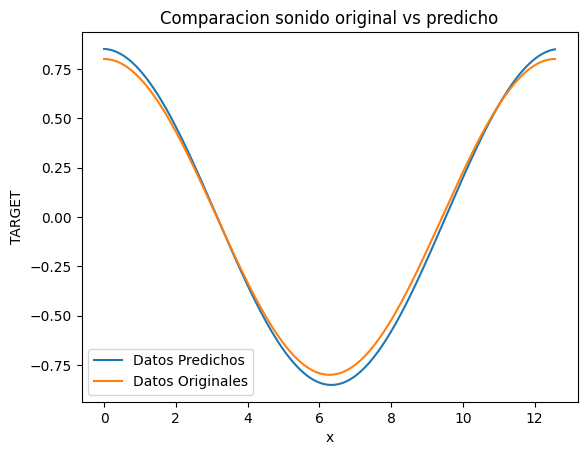

In [464]:
plt.plot(x,data_y_hat,label="Datos Predichos")
plt.plot(x,y,label="Datos Originales")
plt.xlabel("x")
plt.ylabel("TARGET")
plt.title("Comparacion sonido original vs predicho")
plt.legend()
plt.show()

In [465]:
x_min = x.min().min()

long_s = [ y_predict(a_final,b_final,c_final,d,xi) for xi in np.arange(x_min , 20*math.pi, 0.001).astype(np.float32)]

In [466]:
sd.play(y+data_y_hat,44100)
sd.wait()

In [467]:
data_test = pd.read_csv("./data/test.csv")
x_test = data_test['x']
data_test_predicts = []
for value in x_test:
    data_test_predicts.append(y_predict(a_final,b_final,c_final,d,value))

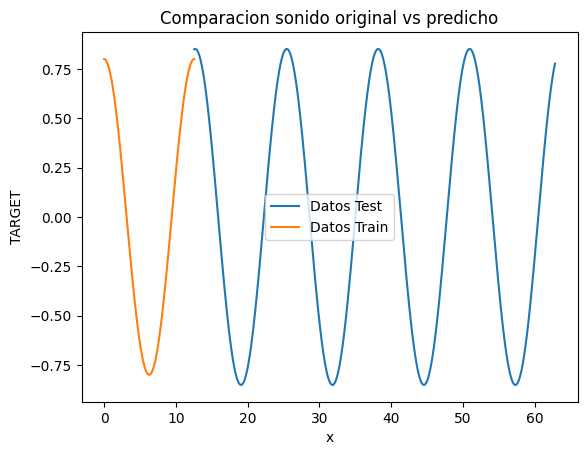

In [468]:
plt.plot(x_test,data_test_predicts,label="Datos Test")
plt.plot(x,y,label="Datos Train")
plt.xlabel("x")
plt.ylabel("TARGET")
plt.title("Comparacion sonido original vs predicho")
plt.legend()
plt.show()

In [469]:
example_id = data_test['example_id']
df_answer = pd.DataFrame(data= zip(example_id,data_test_predicts),
                      columns=["example_id","TARGET"])
df_answer.to_csv("data/prediction_sound.csv", index=False)